# Setup

In [1]:
# INSTALL AND LOAD PACKAGES ################################

# Install pacman ("package manager") if needed
if (!require("pacman")) install.packages("pacman")

# pacman must already be installed; then load contributed
# packages (including pacman) with pacman
pacman::p_load(caret, magrittr, pacman, rio, tidyverse, e1071)
# caret: For k_NN algorithm
# magrittr: for pipes
# pacman: for loading/unloading packages
# rio: for importing data
# tidyverse: for so many reasons

Loading required package: pacman

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pacman’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’



caret installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘openxlsx’



rio installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


e1071 installed



# Load and Preprocess Data

In [2]:
# LOAD AND PREPARE DATA ####################################

# Set random seed
set.seed(333)

# Import Big 5 data
df <- import("b5_df.rds") %>%
  print()

# A tibble: 18,837 x 8
     age gender engnat Extrav Neurot Agree Consc  Open
   <int> <fct>  <fct>   <dbl>  <dbl> <dbl> <dbl> <dbl>
 1    53 Male   Yes       4.4    1.1   4.6   4.7   4.3
 2    46 Female Yes       2.2    3.1   3.5   4.2   2.6
 3    14 Female No        3.5    4.6   3.8   4.9   4.5
 4    19 Female No        2.2    4.3   3.7   2.6   4.1
 5    25 Female No        3.4    3     4.4   3.4   3.4
 6    31 Female Yes       1.6    2.4   3.6   3.1   3.3
 7    20 Female Yes       4.6    2.1   4.5   2.8   4.1
 8    23 Male   No        3.9    1.5   4.1   4.4   4.2
 9    39 Female Yes       4.5    3.5   4.9   4.1   4.1
10    18 Female Yes       1.5    3.7   3.5   4     4.1
# … with 18,827 more rows


[1] 4

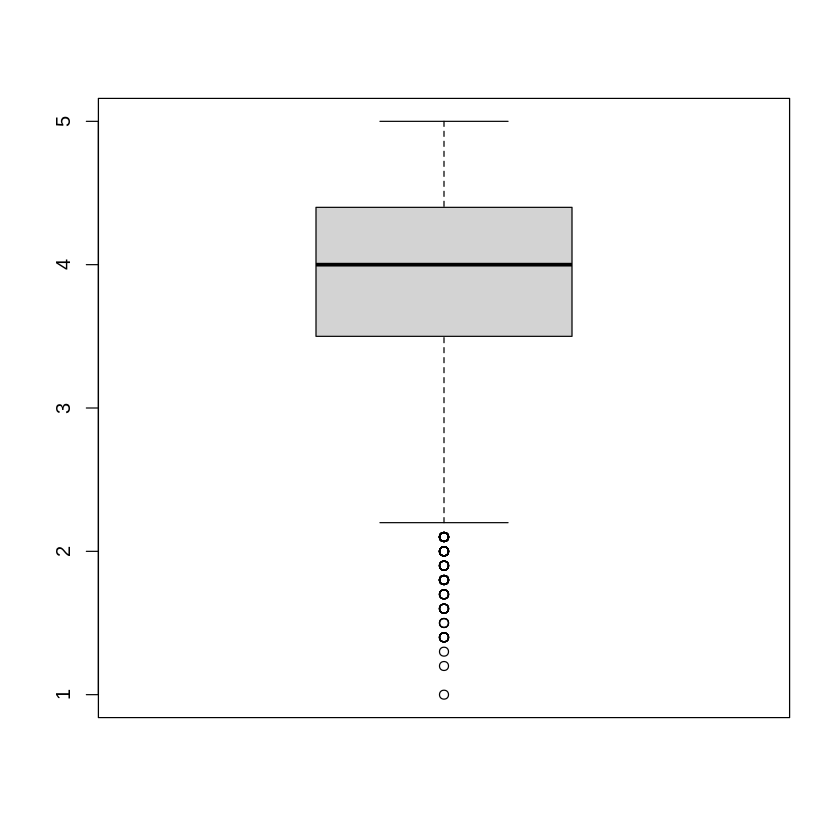

In [3]:
# Boxplot and media for "Open"
df %>%
  pull(Open) %T>%  # use pull() for vector; T-pipe
  boxplot() %>%
  median()

In [4]:
# Dichotomize "Open" for outcome
df %<>%               # Overwrite data
  mutate(
    open_t = ifelse(  # open_t ("text")
      Open >= 4,      # Test
      "Yes",          # Value if true
      "No"            # Value if false
    )
  ) %>%
  print()

# A tibble: 18,837 x 9
     age gender engnat Extrav Neurot Agree Consc  Open open_t
   <int> <fct>  <fct>   <dbl>  <dbl> <dbl> <dbl> <dbl> <chr> 
 1    53 Male   Yes       4.4    1.1   4.6   4.7   4.3 Yes   
 2    46 Female Yes       2.2    3.1   3.5   4.2   2.6 No    
 3    14 Female No        3.5    4.6   3.8   4.9   4.5 Yes   
 4    19 Female No        2.2    4.3   3.7   2.6   4.1 Yes   
 5    25 Female No        3.4    3     4.4   3.4   3.4 No    
 6    31 Female Yes       1.6    2.4   3.6   3.1   3.3 No    
 7    20 Female Yes       4.6    2.1   4.5   2.8   4.1 Yes   
 8    23 Male   No        3.9    1.5   4.1   4.4   4.2 Yes   
 9    39 Female Yes       4.5    3.5   4.9   4.1   4.1 Yes   
10    18 Female Yes       1.5    3.7   3.5   4     4.1 Yes   
# … with 18,827 more rows


In [5]:
# Take random subsample to save time
# df %<>% sample_n(4000)

# SPLIT DATA ###############################################

# Split data into train and test sets
train <- df %>% sample_frac(.70)
test <- anti_join(df, train)


Joining, by = c("age", "gender", "engnat", "Extrav", "Neurot", "Agree", "Consc", "Open", "open_t")



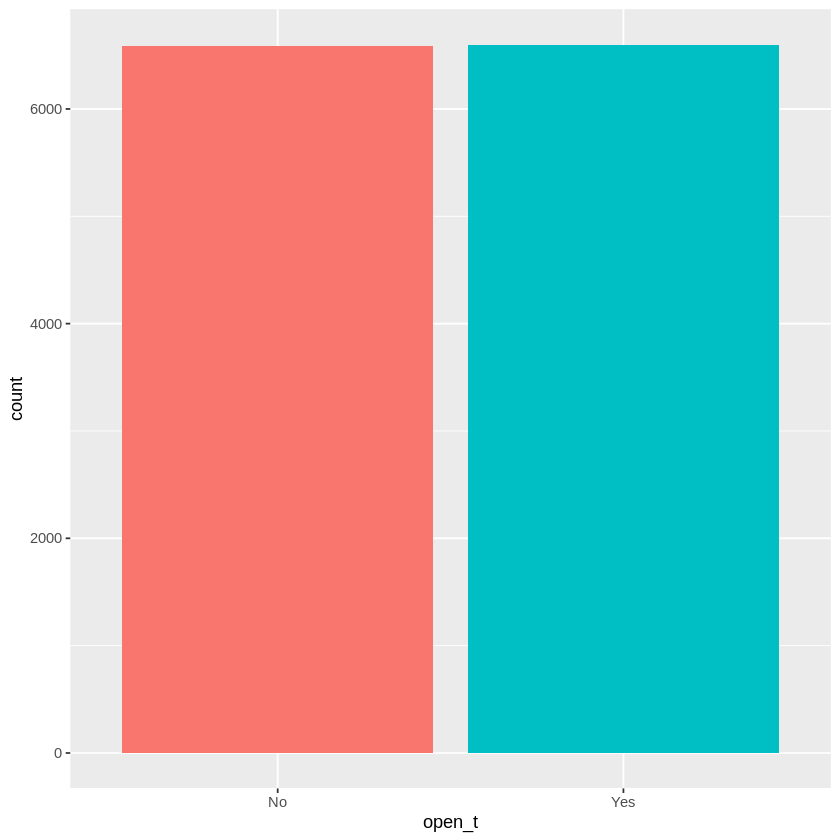

In [6]:
# EXPLORE TRAINING DATA ####################################

# Bar chart of "open_t"
train %>%
  ggplot() + 
  geom_bar(
    aes(
      x    = open_t,  # Variable to chart
      fill = open_t   # Color bars by variable
    )
  ) + 
  theme(legend.position = "none")


# COMPUTE KNN MODEL ON TRAINING DATA

In [26]:
# COMPUTE KNN MODEL ON TRAINING DATA #######################

# Define parameters
statctrl <- trainControl(
  method = "repeatedcv",  # Repeated cross-validation
  number = 10,            # Number of folds
  repeats = 3             # Number of complete sets of folds
) 


In [24]:
# Define and save model
fit <- train(
  open_t ~ age + gender + Extrav + Neurot + Agree + Consc,
  data = train,          # Use training data
  method = "knn", 
  trControl = statctrl,
  tuneLength = 20,       # 20 dif values for k
  na.action = "na.omit"
)

# APPLY MODEL TO TEST DATA

In [27]:
# Apply model to training data (takes a moment)
fit

k-Nearest Neighbors 

13186 samples
    6 predictor
    2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 11867, 11868, 11867, 11867, 11867, 11867, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa     
   5  0.5457543  0.09156636
   7  0.5510381  0.10214812
   9  0.5591786  0.11844176
  11  0.5635530  0.12720319
  13  0.5678246  0.13575760
  15  0.5710349  0.14218552
  17  0.5742205  0.14856596
  19  0.5726785  0.14548863
  21  0.5765204  0.15317835
  23  0.5756354  0.15141653
  25  0.5753827  0.15091933
  27  0.5771269  0.15441152
  29  0.5785687  0.15730399
  31  0.5781387  0.15644888
  33  0.5783664  0.15691041
  35  0.5772032  0.15459025
  37  0.5782395  0.15666555
  39  0.5783153  0.15682151
  41  0.5790737  0.15834485
  43  0.5787197  0.15764180

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 41.

In [28]:
# APPLY MODEL TO TEST DATA #################################

# Predict test set
open_p <- predict(  # Create new variable ("predicted")
  fit,              # Apply saved model
  newdata = test    # Use test data
)



In [29]:
# Accuracy of model on test data
table(
  actualclass = test$open_t,  # True outcome
  predictedclass = open_p     # Predicted outcome
) %>%
confusionMatrix() %>%         # Accuracy statistics
print()

Confusion Matrix and Statistics

           predictedclass
actualclass   No  Yes
        No  1873  908
        Yes 1505 1365
                                        
               Accuracy : 0.573         
                 95% CI : (0.56, 0.5859)
    No Information Rate : 0.5978        
    P-Value [Acc > NIR] : 0.9999        
                                        
                  Kappa : 0.1486        
                                        
 Mcnemar's Test P-Value : <2e-16        
                                        
            Sensitivity : 0.5545        
            Specificity : 0.6005        
         Pos Pred Value : 0.6735        
         Neg Pred Value : 0.4756        
             Prevalence : 0.5978        
         Detection Rate : 0.3314        
   Detection Prevalence : 0.4921        
      Balanced Accuracy : 0.5775        
                                        
       'Positive' Class : No            
                                        


# Clean Up

In [30]:
# CLEAN UP #################################################

# Clear data
rm(list = ls())  # Removes all objects from environment

# Clear packages
p_unload(all)  # Remove all contributed packages

# Clear plots
graphics.off()  # Clears plots, closes all graphics devices

# Clear console
cat("\014")  # Mimics ctrl+L

# Clear mind :)

The following packages have been unloaded:
e1071, forcats, stringr, dplyr, purrr, readr, tidyr, tibble, tidyverse, rio, pacman, magrittr, caret, ggplot2, lattice




# K- Means Clustering

In [31]:
# INSTALL AND LOAD PACKAGES ################################

# Install pacman ("package manager") if needed
if (!require("pacman")) install.packages("pacman")

# pacman must already be installed; then load contributed
# packages (including pacman) with pacman
pacman::p_load(cluster, datasets, factoextra, magrittr,  
  pacman, rio, tidyverse)
# cluster:  for cluster analysis
# datasets: for sample data
# factoextra: for evaluating clusters
# magrittr: for pipes
# pacman: for loading/unloading packages
# rio: for importing data
# tidyverse: for so many reasons



Loading required package: pacman

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘corrplot’, ‘viridis’, ‘car’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘ggrepel’



factoextra installed



In [32]:
# LOAD AND PREPARE DATA ####################################

# Load data
?mtcars

# Select variables and save data
df <- mtcars %>%
  select(mpg, cyl, disp, hp, wt, qsec, gear, carb) %>%
  print()

# Scale data for clustering
df_z <- df %>%
  scale() %>%
  print()



                     mpg cyl  disp  hp    wt  qsec gear carb
Mazda RX4           21.0   6 160.0 110 2.620 16.46    4    4
Mazda RX4 Wag       21.0   6 160.0 110 2.875 17.02    4    4
Datsun 710          22.8   4 108.0  93 2.320 18.61    4    1
Hornet 4 Drive      21.4   6 258.0 110 3.215 19.44    3    1
Hornet Sportabout   18.7   8 360.0 175 3.440 17.02    3    2
Valiant             18.1   6 225.0 105 3.460 20.22    3    1
Duster 360          14.3   8 360.0 245 3.570 15.84    3    4
Merc 240D           24.4   4 146.7  62 3.190 20.00    4    2
Merc 230            22.8   4 140.8  95 3.150 22.90    4    2
Merc 280            19.2   6 167.6 123 3.440 18.30    4    4
Merc 280C           17.8   6 167.6 123 3.440 18.90    4    4
Merc 450SE          16.4   8 275.8 180 4.070 17.40    3    3
Merc 450SL          17.3   8 275.8 180 3.730 17.60    3    3
Merc 450SLC         15.2   8 275.8 180 3.780 18.00    3    3
Cadillac Fleetwood  10.4   8 472.0 205 5.250 17.98    3    4
Lincoln Continental 10.4

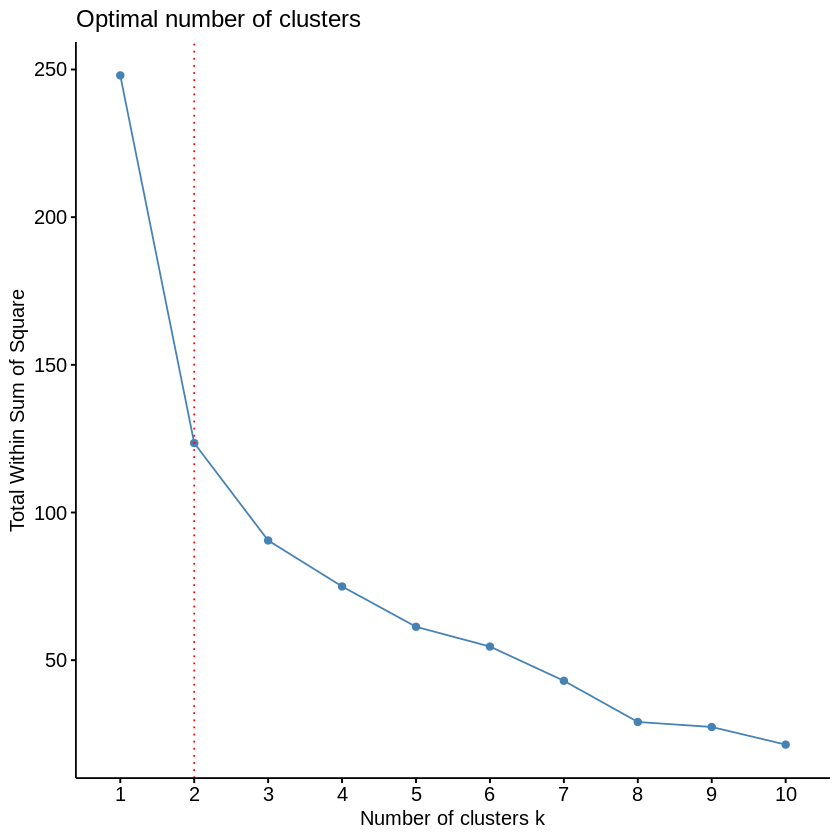

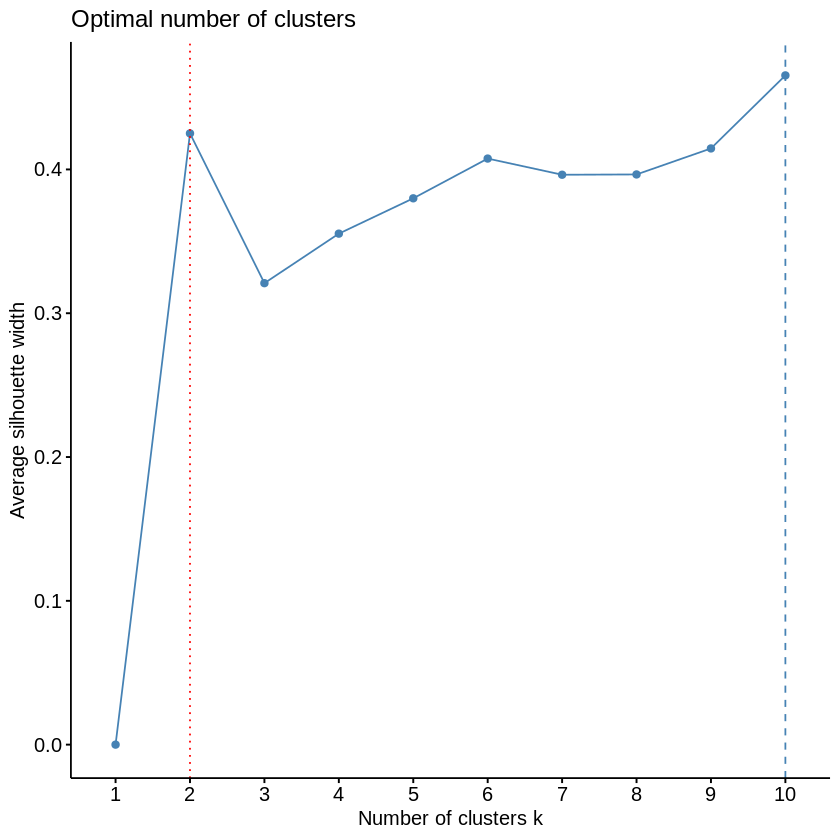

In [33]:
# OPTIMAL NUMBER OF CLUSTERS ###############################

# Elbow method
df_z %>%
  fviz_nbclust(          # From factoextra
    FUN = kmeans,        # Use k-means
    method = "wss"       # "within cluster sums of squares"
  ) +
  geom_vline(            # Reference line
    xintercept = 2, 
    color = "red", 
    linetype = "dotted"
  )                      # Look for "bend" in curve

# Silhouette method
df_z %>%
  fviz_nbclust(
    FUN = kmeans,          # Use k-means
    method = "silhouette"  # Look for maximum width
) +
geom_vline(                # Reference line
  xintercept = 2, 
  color = "red", 
  linetype = "dotted"
  )  



K-means clustering with 2 clusters of sizes 13, 19

Cluster means:
         mpg        cyl      disp         hp         wt       qsec       gear
1  0.9141235 -1.0525701 -0.844018 -0.8784049 -0.7866582  0.7807165  0.3192947
2 -0.6254529  0.7201795  0.577486  0.6010139  0.5382398 -0.5341745 -0.2184648
        carb
1 -0.8364051
2  0.5722772

Clustering vector:
          Mazda RX4       Mazda RX4 Wag          Datsun 710      Hornet 4 Drive 
                  2                   2                   1                   1 
  Hornet Sportabout             Valiant          Duster 360           Merc 240D 
                  2                   1                   2                   1 
           Merc 230            Merc 280           Merc 280C          Merc 450SE 
                  1                   2                   2                   2 
         Merc 450SL         Merc 450SLC  Cadillac Fleetwood Lincoln Continental 
                  2                   2                   2              

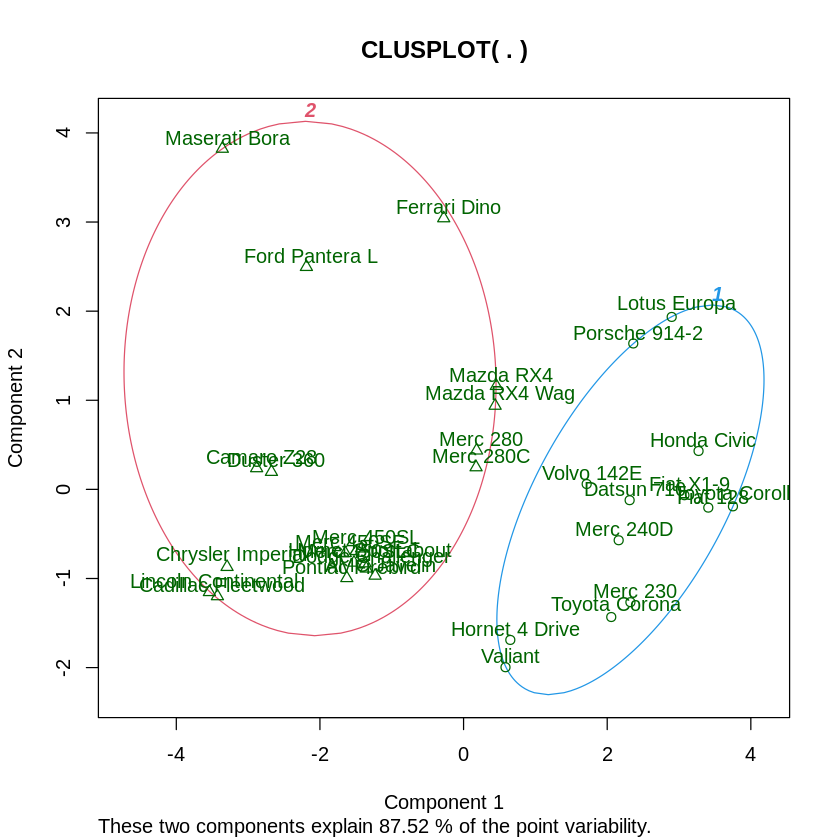

In [34]:
# K-MEANS CLUSTERING #######################################

# Compute two clusters
km <- df_z %>% 
  kmeans(2) %>%
  print()

# Graph two clusters
df_z %>%
  clusplot(
    km$cluster,     # cluster data
    color  = TRUE,  # color
    lines  = 0,     # No lines connecting centroids
    labels = 2      # Labels clusters and cases
  )




In [35]:
# ADD CLUSTERS TO DF #######################################

df %<>%                          # Overwrite data
  rownames_to_column("car") %>%  # Create var with car names
  mutate(
    cluster = km$cluster         # Create cluster variable
  ) %>%
  select(                        # Reorder variables
    car,
    cluster,
    everything()
  ) %>%
  arrange(                       # Sort data
    cluster,                     # First by cluster
    car                          # Then by name of car
  ) %>%
  print()



                   car cluster  mpg cyl  disp  hp    wt  qsec gear carb
1           Datsun 710       1 22.8   4 108.0  93 2.320 18.61    4    1
2             Fiat 128       1 32.4   4  78.7  66 2.200 19.47    4    1
3            Fiat X1-9       1 27.3   4  79.0  66 1.935 18.90    4    1
4          Honda Civic       1 30.4   4  75.7  52 1.615 18.52    4    2
5       Hornet 4 Drive       1 21.4   6 258.0 110 3.215 19.44    3    1
6         Lotus Europa       1 30.4   4  95.1 113 1.513 16.90    5    2
7             Merc 230       1 22.8   4 140.8  95 3.150 22.90    4    2
8            Merc 240D       1 24.4   4 146.7  62 3.190 20.00    4    2
9        Porsche 914-2       1 26.0   4 120.3  91 2.140 16.70    5    2
10      Toyota Corolla       1 33.9   4  71.1  65 1.835 19.90    4    1
11       Toyota Corona       1 21.5   4 120.1  97 2.465 20.01    3    1
12             Valiant       1 18.1   6 225.0 105 3.460 20.22    3    1
13          Volvo 142E       1 21.4   4 121.0 109 2.780 18.60   

In [36]:
# CLEAN UP #################################################

# Clear data
rm(list = ls())  # Removes all objects from environment

# Clear packages
detach("package:datasets", unload = T)  # For base packages
p_unload(all)  # Remove all contributed packages

# Clear plots
graphics.off()  # Clears plots, closes all graphics devices

# Clear console
cat("\014")  # Mimics ctrl+L

# Clear mind :)

The following packages have been unloaded:
forcats, stringr, dplyr, purrr, readr, tidyr, tibble, tidyverse, rio, magrittr, factoextra, ggplot2, cluster, pacman


